In [25]:
from __future__ import print_function
__author__ = '__fbb__'

import os 
import pandas as pd
DFDATA = "/gws/open/NYCOpenData/nycopendata/data/"
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [84]:
''' Reads in CSV files from the CUSP Data Facility and plots numberical values and time series
NOTE: must have the DFDATA environmental variable pointing to "/gws/open/NYCOpenData/nycopendata/data/"
Part 1 uses the Natural Gas Consumption data https://datahub.cusp.nyu.edu/dataset/uedp-fegm
Part 2 uses the Social Media metions of NYC agencies data https://datahub.cusp.nyu.edu/dataset/5b3a-rs48
'''

' Reads in CSV files from the CUSP Data Facility and plots numberical values and time series\nNOTE: must have the DFDATA environmental variable pointing to "/gws/open/NYCOpenData/nycopendata/data/"\nPart 1 uses the Natural Gas Consumption data https://datahub.cusp.nyu.edu/dataset/uedp-fegm\nPart 2 uses the Social Media NYC data https://datahub.cusp.nyu.edu/dataset/5b3a-rs48\n'

## Part 1. Gas Data

In [86]:
# read in gas data
df_gas = pd.read_csv(DFDATA + "/uedp-fegm/1414245967/uedp-fegm")
df_gas.columns

Index([u'Zip Code', u'Building type (service class', u' Consumption (therms) ',
       u' Consumption (GJ) ', u'Utility/Data Source'],
      dtype='object')

In [87]:
# display top rows of gas data table 
df_gas.head()

,Zip Code,Building type (service class,Consumption (therms),Consumption (GJ),Utility/Data Source
0,"10001\n(40.75025902143676, -73.99688630375988)",Residential,58338,6155,ConEd
1,"10002\n(40.71612146793143, -73.98583147024613)",Residential,550055,58034,ConEd
2,"10003\n(40.73194394755518, -73.98887214913032)",Residential,260502,27484,ConEd
3,"10005\n(40.7061257920717, -74.00858468583453)",Residential,265,28,ConEd
4,"10006\n(40.70825614030866, -74.01355356964149)",Residential,2076,219,ConEd


In [88]:
# remove columns not to be used and display the reducted table
df_gas.drop(['Zip Code', u'Building type (service class', u'Utility/Data Source'], axis=1, inplace=True)
df_gas.head()

,Consumption (therms),Consumption (GJ)
0,58338,6155
1,550055,58034
2,260502,27484
3,265,28
4,2076,219


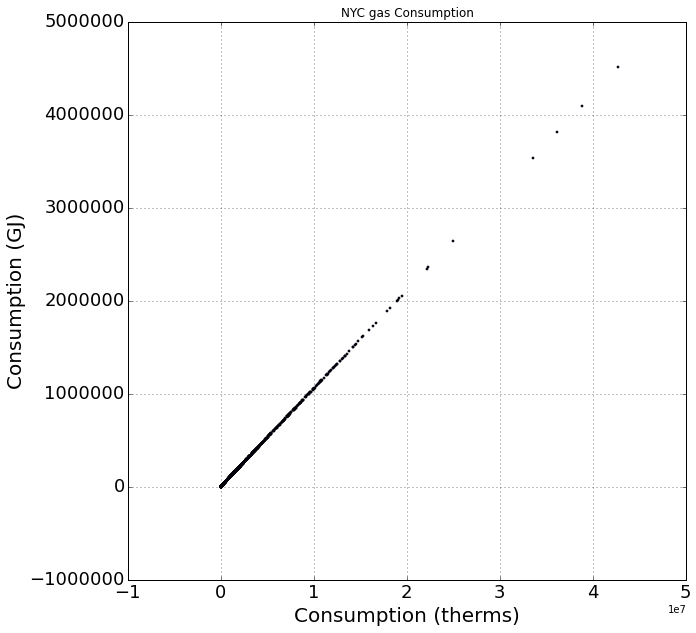

In [98]:
# plot Gas comsumption 
ax_gas = df_gas.plot(x = ' Consumption (therms) ', y = ' Consumption (GJ) ', kind = 'scatter', 
            s = 3, title = "NYC gas Consumption", figsize = (10,10), fontsize = 18)
ax_gas.set_xlabel('Consumption (therms)', fontsize = 20)
ax_gas.set_ylabel('Consumption (GJ)', fontsize = 20)

### Figure 1.
This figure show the consumption in units of _Giga Jules_ plotted againsty the consumption in units of _therms_. Since the relation is linear (it is just a unit conversion) we expect a 1-to-1 mapping of one value to the other. Fortunately that is what we see indicating no mistakes or issues with the data.

## Part 2. Social Media Data

In [102]:
# read in Social Media data
df_sm = pd.read_csv(DFDATA + "/5b3a-rs48/1414245944/5b3a-rs48")
df_sm.columns

Index([u'Agency', u'Platform', u'Url', u'Date Sampled',
       u'Likes/Followers/Visits/Downloads'],
      dtype='object')

In [103]:
# display top rows of Social Media data table 
df_sm.head()

,Agency,Platform,Url,Date Sampled,Likes/Followers/Visits/Downloads
0,nycgov,Google+,https://plus.google.com/u/0/b/1040309112776424...,12/12/2012 12:00:00 AM,NaN
1,TLC,Facebook,http://www.facebook.com/pages/NYC-Taxi-and-Lim...,12/12/2012 12:00:00 AM,505
2,DRIS,YouTube,http://www.youtube.com/nycdeptofrecords,12/12/2012 12:00:00 AM,NaN
3,Veteran's Affairs,Youtube,http://www.youtube.com/channel/UCi6IvOszIb3hHP...,12/12/2012 12:00:00 AM,NaN
4,NYC Water,Youtube,http://www.youtube.com/nycwater,12/12/2012 12:00:00 AM,NaN


In [104]:
# convert date string to date time objects and remove columns not to be used and display the reducted table
df_sm['DateSampled'] = pd.to_datetime(df_sm['Date Sampled'])
df_sm.drop([u'Agency', u'Platform', u'Url', 'Date Sampled'], axis = 1, inplace = True)
df_sm.head()

,Likes/Followers/Visits/Downloads,DateSampled
0,NaN,2012-12-12
1,505,2012-12-12
2,NaN,2012-12-12
3,NaN,2012-12-12
4,NaN,2012-12-12


In [105]:
# display further information on the datetime series to assure conversion was succesful
df_sm.DateSampled.describe()

count                    5899
unique                     20
top       2012-09-21 00:00:00
freq                      295
first     2011-08-08 00:00:00
last      2012-12-12 00:00:00
Name: DateSampled, dtype: object

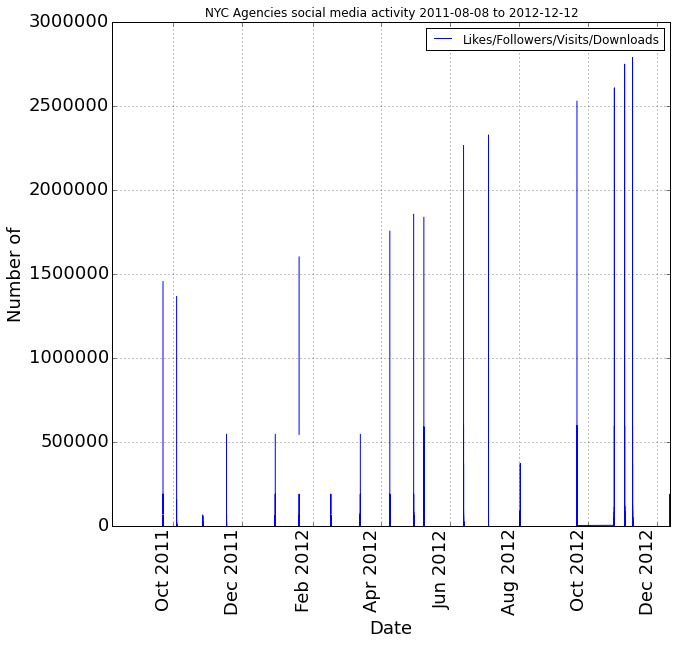

In [112]:
# plot a time series of Social Media activity
ax = df_sm.plot(x = 'DateSampled', y = 'Likes/Followers/Visits/Downloads', rot=90, 
                figsize = (10,10), fontsize = 18, 
                title = "NYC Agencies social media activity 2011-08-08 to 2012-12-12")

ax.set_ylabel("Number of", fontsize = 18)
ax.set_xlabel("Date", fontsize = 18)


## Figure 2
This figure displays the social media activity involving mentions of NYC Agencies from October 2011 through December 2012. We see a steady increase in the activity, although the time behavior is irregular and semi-periodic spikes corresponding to ~10-fold increase in the activity are visible throughout the entire timeline. It would be interesting to investigate what these spikes corresponds to: we can speculate they may occurr in occasion of promotional events by the agencies (including hackathons), or in occasion of events of city relevance in NYC.
